## Bag, not Bag (Hyungjoo Kim with Team "Betago"), email: hyungjoo.kim.20@ucl.ac.uk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
train_imgs = np.load('./comp0090/fashion-train-imgs.npz')     # 28, 28, 120000
train_label = np.load('./comp0090/fashion-train-labels.npz')   # 12000, 
dev_imgs = np.load('./comp0090/fashion-dev-imgs.npz')          # 28, 28, 1000
dev_label = np.load('./comp0090/fashion-dev-labels.npz')       # 1000,
test_imgs = np.load('./comp0090/fashion-test-imgs.npz')        # 28, 28, 1000
test_label = np.load('./comp0090/fashion-test-labels.npz')     # 1000, 

print(train_imgs.shape)
print(train_label.shape)
print(dev_imgs.shape)
print(dev_label.shape)
print(test_imgs.shape)
print(test_label.shape)

(28, 28, 12000)
(12000,)
(28, 28, 1000)
(1000,)
(28, 28, 1000)
(1000,)


[10282  7294  3602 11829  5304  6220  2730  6871 11758  3203  6059  9222
  4027   808  2686 10431   776  3808  5708  8599  5029  9196  5384  3554
  9021]
(25, 784)


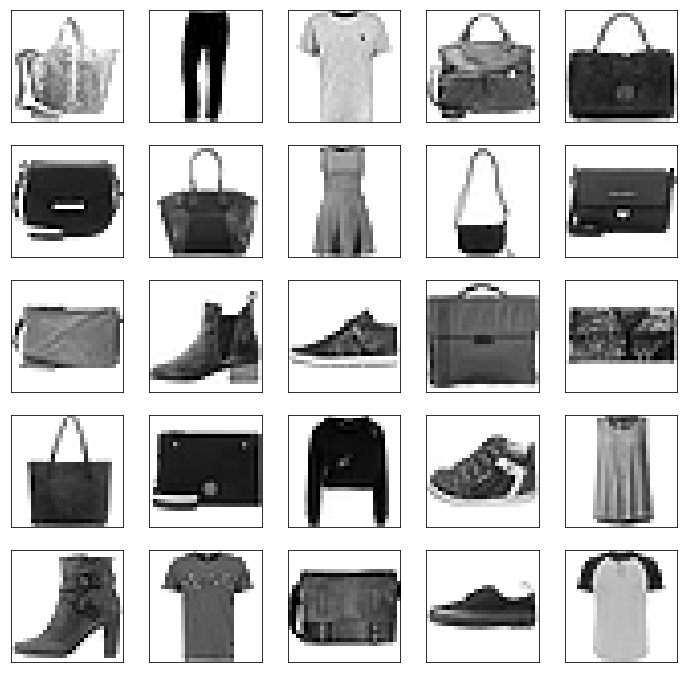

In [3]:
train_imgs_data = np.zeros((train_imgs.shape[2],train_imgs.shape[1]*train_imgs.shape[0]))
for k in range(train_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     train_imgs_data[k][index] = train_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(train_imgs_data.shape[0]), 25)
sample_images = train_imgs_data[sample_idx, :]
print(sample_idx)
print(sample_images.shape)
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

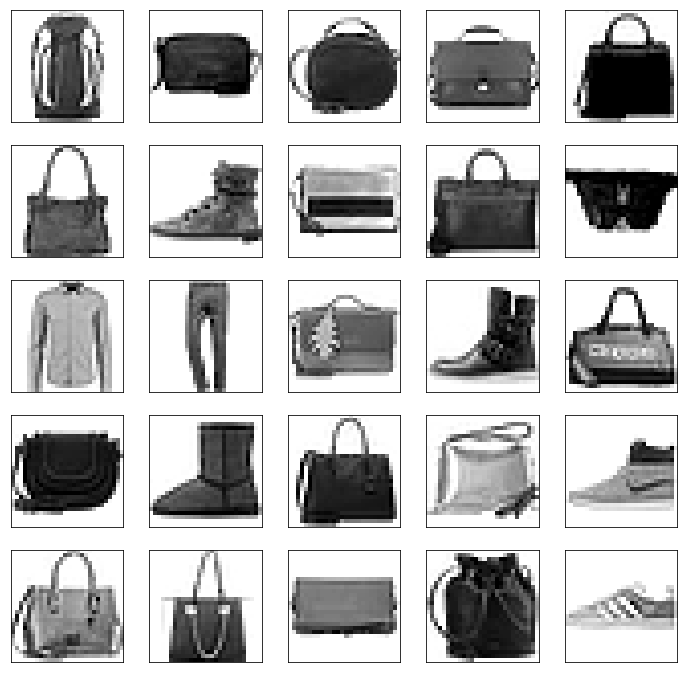

In [4]:
dev_imgs_data = np.zeros((dev_imgs.shape[2],dev_imgs.shape[1]*dev_imgs.shape[0]))
for k in range(dev_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     dev_imgs_data[k][index] = dev_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(dev_imgs_data.shape[0]), 25)
sample_images = dev_imgs_data[sample_idx, :]
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

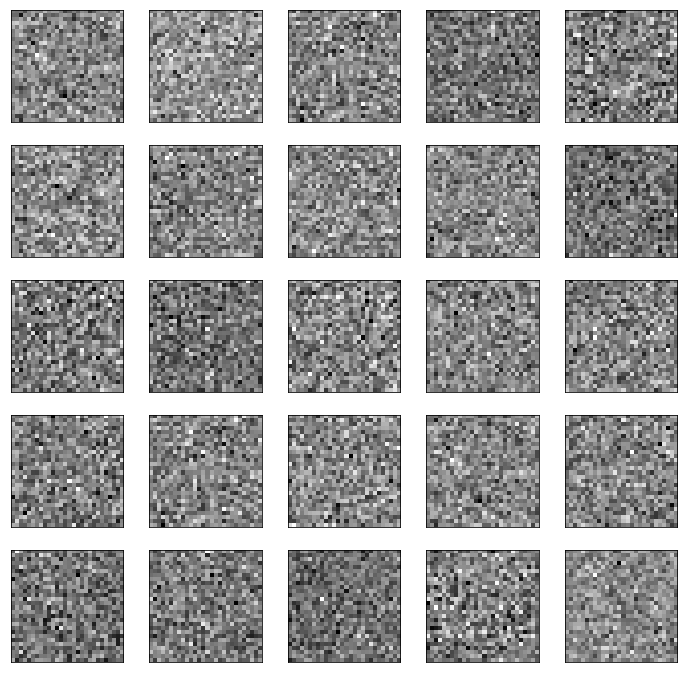

In [5]:
test_imgs_data = np.zeros((test_imgs.shape[2],test_imgs.shape[1]*test_imgs.shape[0]))
for k in range(test_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     test_imgs_data[k][index] = test_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(test_imgs_data.shape[0]), 25)
sample_images = test_imgs_data[sample_idx, :]
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

In [9]:
# Three-lyaer Multi-layer Perceptron
# Assuming the log-likelihood loss, derive the analytical gradients for the model parameters.
def sigmoid(z): #sigmoid function as activation function
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z): #The gradient of the sigmoid function
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))

def forward_propagate(X, theta1, theta2, theta3, b1, b2, b3): #the forward propagation function
    m = X.shape[0]
    #input layer
    a1 = np.insert(X, 0, values=np.ones(m), axis=1)
    #input layer times W1 and plus b1
    z2 = a1 * theta1.T + b1
    #second layer after sigmoid function from z2t
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1)
    #second layer times W2 and plus b2
    z3 = a2 * theta2.T + b2
    #third layer after sigmoid function from z3t
    a3 = np.insert(sigmoid(z3), 0, values=np.ones(m), axis=1)
    #third layer times W3 and plus b3
    z4 = a3 * theta3.T + b3
    #prediction
    h = sigmoid(z4)
    return a1, z2, a2, z3, a3, z4 ,h

def backprop(theta1, theta2, theta3, b1, b2, b3, X, y):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)

    # run the feed forward propagation and get the values of each layer
    a1, z2, a2, z3, a3, z4 ,h = forward_propagate(X, theta1, theta2, theta3,b1 ,b2 ,b3) 
    
    # Inialise the gradient of each model parameters and loss J
    J = 0 #Loss 
    delta1 = np.zeros(theta1.shape) #gradient of  theta1
    delta2 = np.zeros(theta2.shape) #gradient of  theta2
    delta3 = np.zeros(theta3.shape) #gradient of  theta3

    delta_b_1 = np.zeros(b1.shape) #gradient of b1
    delta_b_2 = np.zeros(b2.shape) #gradient of b2
    delta_b_3 = np.zeros(b3.shape) #gradient of b3
    
    # compute the log-likelihood loss
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m

    # run backpropagation
    for t in range(m):
        a1t = a1[t,:]  #input layer
        z2t = z2[t,:]  #input layer times W1 and plus b1
        a2t = a2[t,:]  #second layer after sigmoid function from z2t
        z3t = z3[t,:]  #second layer times W2 and plus b2
        a3t = a3[t,:]  #third layer after sigmoid function from z3t

        ht = h[t,:]    #prediction
        yt = y[t,:]    #label
        
        d4t = ht - yt  #third layer difference
        z3t = np.insert(z3t, 0, values=np.ones(1))  
        d3t = np.multiply((theta3.T * d4t.T).T, sigmoid_gradient(z3t))  #second layer difference
        z2t = np.insert(z2t, 0, values=np.ones(1))  
        d2t = np.multiply((theta2.T * d3t.T[1:,:]).T, sigmoid_gradient(z2t))  #first layer difference
        #sum up the difference
        delta1 = delta1 + (d2t[:,1:]).T * a1t 
        delta2 = delta2 + (d3t[:,1:]).T * a2t
        delta3 = delta3 + d4t.T * a3t
        delta_b_1 = delta_b_1 + (d2t[:,1:])
        delta_b_2 = delta_b_2 + (d3t[:,1:])
        delta_b_3 = delta_b_3 + d4t
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    delta3 = delta3 / m
    
    delta_b_1 = delta_b_1 / m
    delta_b_2 = delta_b_2 / m
    delta_b_3 = delta_b_3 / m
    
    return J, delta1, delta2, delta3, delta_b_1, delta_b_2, delta_b_3, theta1, theta2, theta3, b1, b2, b3

In [10]:
def analytical_grad(theta1, theta2, theta3, b1, b2, b3, X, y):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # run the feed forward propagation and get the values of each layer
    a1, z2, a2, z3, a3, z4 ,h = forward_propagate(X, theta1, theta2, theta3,b1 ,b2, b3)
    
    # Inialise the gradient of each model parameters and loss J
    J = 0 #Loss
    delta1 = np.zeros(theta1.shape) #gradient of W1
    delta2 = np.zeros(theta2.shape) #gradient of W2
    delta3 = np.zeros(theta3.shape) #gradient of W3
    
    delta_b_1 = np.zeros(b1.shape) #gradient of b1
    delta_b_2 = np.zeros(b2.shape) #gradient of b2
    delta_b_3 = np.zeros(b3.shape) #gradient of b3
    # compute the log-likelihood loss
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
        
    J = J / m
    
    # run backpropagation
    for t in range(m):
        a1t = a1[t,:] #input layer
        z2t = z2[t,:] #input layer times W1 and plus b1
        a2t = a2[t,:] #second layer after sigmoid function from z2t
        z3t = z3[t,:] #second layer times W2 and plus b2
        a3t = a3[t,:] #third layer after sigmoid function from z3t
        
        ht = h[t,:] #prediction
        yt = y[t,:] #label
        
        d4t = ht - yt #third layer difference
        z3t = np.insert(z3t, 0, values=np.ones(1))
        d3t = np.multiply((theta3.T * d4t.T).T, sigmoid_gradient(z3t)) #second layer difference
        z2t = np.insert(z2t, 0, values=np.ones(1))
        d2t = np.multiply((theta2.T * d3t.T[1:,:]).T, sigmoid_gradient(z2t)) #first layer difference
        
        # using the derivation of analytical gradients in W from question 2
        delta1 = delta1 + (d2t[:, 1:]).T * a1t
        delta2 = delta2 + (d3t[:, 1:]).T * a2t
        delta3 = delta3 + d4t.T * a3t

        # using the derivation of analytical gradients in b from question 2
        delta_b_1 = delta_b_1 + (d2t[:, 1:])
        delta_b_2 = delta_b_2 + (d3t[:, 1:])
        delta_b_3 = delta_b_3 + d4t

    delta1 = delta1 / m #gradient of W1
    delta2 = delta2 / m #gradient of W2
    delta3 = delta3 / m #gradient of W3

    delta_b_1 = delta_b_1 / m #gradient of b1
    delta_b_2 = delta_b_2 / m #gradient of b2
    delta_b_3 = delta_b_3 / m #gradient of b3
    return J, delta1, delta2, delta3, delta_b_1, delta_b_2, delta_b_3, theta1, theta2, theta3, b1, b2, b3

In [11]:
input_size = 784 #input size, which is the number of pixels in the graph
hidSize_1 = 30 #size of the first hidden layer
hidSize_2 = 20 #size of the second hidden layer
num_labels = 2 #number of labels in the output

params = (np.random.random(size = hidSize_1 * (input_size + 1) + hidSize_2 * (hidSize_1 + 1) + num_labels * (hidSize_2 + 1)) - 0.5) * 0.24
theta1 = np.matrix(np.reshape(params[:hidSize_1 * (input_size + 1)], (hidSize_1, (input_size + 1))))
theta2 = np.matrix(np.reshape(params[hidSize_1 * (input_size + 1):hidSize_2 * (hidSize_1 + 1) + hidSize_1 * (input_size + 1)], (hidSize_2, (hidSize_1 + 1))))
theta3 = np.matrix(np.reshape(params[hidSize_2 * (hidSize_1 + 1) + hidSize_1 * (input_size + 1):], (num_labels, (hidSize_2 + 1))))

#add b term
paramsB=(np.random.random(size = hidSize_1  + hidSize_2  + num_labels )-0.5)*0.24
b1 = np.matrix(np.reshape(paramsB[:hidSize_1 ],(1, (hidSize_1))))
b2 = np.matrix(np.reshape(paramsB[hidSize_1 : hidSize_1 + hidSize_2 ],(1, (hidSize_2))))
b3 = np.matrix(np.reshape(paramsB[hidSize_1 + hidSize_2 : ],(1, (num_labels))))

In [12]:
#change the label to one_hot format
def one_hot_label(label):
    new_label=[]
    for i in range(label.shape[0]):
        if label[i] not in new_label:
            new_label.append(label[i])
    one_hot_encoder = np.zeros((label.shape[0], np.mat(new_label).shape[1]))
    for i in range(label.shape[0]):
        one_hot_encoder[i][label[i]] = 1
    return one_hot_encoder

#import the data and label
train_input = train_imgs_data #train data set
train_output = one_hot_label(train_label) #train label
val_input = dev_imgs_data #validation date set
val_output = one_hot_label(dev_label) #validation label
X = train_input
Y = train_output
#run the analytical gradients function
J, delta1, delta2, delta3, delta_b_1, delta_b_2, delta_b_3, theta1, theta2, theta3, b1, b2, b3 = analytical_grad(theta1, theta2, theta3, b1, b2, b3, X, Y)

def cost(theta1, theta2, theta3, b1, b2, b3, X, y):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    # run the forward propagate
    a1, z2, a2, z3, a3, z4 ,h = forward_propagate(X, theta1, theta2, theta3, b1, b2, b3)

    # compute the cross entropy loss
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    return J

In [13]:
def finDiff_gradCheck(theta1):
    e_value = 0.00005 #set the value of error
    e = np.zeros(theta1.shape)
    gradient = np.zeros(theta1.shape)
    for i in range(theta1.shape[0]):
        for j in range(theta1.shape[1]):
            e[i, j] = e_value
            #the euqtion of finite difference
        gradient[i,j] = (cost(theta1 + e, theta2, theta3, b1, b2, b3, X, Y) - cost(theta1 - e, theta2, theta3, b1, b2, b3, X, Y))/2/e_value
        e = np.zeros(theta1.shape)
        
        #get the first ten gradients and stop the function
        if j == 10:
            return gradient
    return gradient

# the comparison result between gradient with respect to W1 computing by finite difference and computing by analytical gradients
gradient_theta1 = finDiff_gradCheck(theta1)

def finDiff_gradCheck_b1(b1):
    e_value = 0.00005 #set the value of error
    e = np.zeros(b1.shape)
    gradient = np.zeros(b1.shape)
    for i in range(b1.shape[0]):
        for j in range(b1.shape[1]):
            e[i,j] = e_value
            gradient[i,j] = (cost(theta1, theta2, theta3, b1+e, b2, b3, X, Y)-cost(theta1, theta2, theta3, b1-e, b2, b3, X, Y))/2/e_value
            e = np.zeros(b1.shape)
            if j == 10:
                return gradient #stop the function when 10 gradients have been obtained
    return gradient
gradient_b1 = finDiff_gradCheck_b1(b1) #run the function

In [14]:
def finDiff_gradCheck_theta2(theta2):
    e_value = 0.00005 #set the value of error
    e = np.zeros(theta2.shape)
    gradient = np.zeros(theta2.shape)
    for i in range(theta2.shape[0]):
        for j in range(theta2.shape[1]):
            e[i,j] = e_value
            gradient[i,j] = (cost(theta1, theta2+e, theta3, b1, b2, b3, X, Y)-cost(theta1, theta2-e, theta3, b1, b2, b3, X, Y))/2/e_value
            e = np.zeros(theta2.shape)
            if j == 10:
                return gradient #stop the function when 10 gradients have been obtained
    return gradient
gradient_theta2 = finDiff_gradCheck_theta2(theta2)

def finDiff_gradCheck_b2(b2):
    e_value = 0.00005
    e = np.zeros(b2.shape) #set the error of function
    gradient = np.zeros(b2.shape)
    for i in range(b2.shape[0]):
        for j in range(b2.shape[1]):
            e[i,j] = e_value
            gradient[i,j] = (cost(theta1, theta2, theta3, b1, b2+e, b3, X, Y)-cost(theta1, theta2, theta3, b1, b2-e, b3, X, Y))/2/e_value
            e = np.zeros(b2.shape)
            if j == 10:
                return gradient #stop the function when 10 gradients have been obtained
    return gradient
gradient_b2 = finDiff_gradCheck_b2(b2)

In [15]:
def finDiff_gradCheck_theta3(theta3):
    e_value = 0.00005
    e = np.zeros(theta3.shape)
    gradient = np.zeros(theta3.shape)
    for i in range(theta3.shape[0]):
        for j in range(theta3.shape[1]):
            e[i,j] = e_value
            gradient[i,j] = (cost(theta1, theta2, theta3+e, b1, b2, b3, X, Y)-cost(theta1, theta2, theta3-e, b1, b2, b3, X, Y))/2/e_value
            e = np.zeros(theta3.shape)
            if j == 10:
                return gradient #stop the function when 10 gradients have been obtained
    return gradient
gradient_theta3 = finDiff_gradCheck_theta3(theta3)

def finDiff_gradCheck_b3(b3):
    e_value = 0.00005 #set the error of function
    e = np.zeros(b3.shape)
    gradient = np.zeros(b3.shape)
    for i in range(b3.shape[0]):
        for j in range(b3.shape[1]):
            e[i,j] = e_value
            gradient[i,j] = (cost(theta1, theta2, theta3, b1, b2, b3+e, X, Y)-cost(theta1, theta2, theta3, b1, b2, b3-e, X, Y))/2/e_value
            e = np.zeros(b3.shape)
            if j == 10:
                return gradient #stop the function when 10 gradients have been obtained
    return gradient
gradient_b3 = finDiff_gradCheck_b3(b3)

In [26]:
def change_to_onehot(prediction, num_labels):
    one_hot = np.zeros((prediction.shape[0], num_labels))
    parameter = one_hot.shape[0]
    for i in range(parameter):
        if prediction[i] == 0: #to check the label of the perdition
            one_hot[i][0] = 1
            one_hot[i][1] = 0
        else:
            one_hot[i][0] = 0
            one_hot[i][1] = 1
    return one_hot #return the prediction in one hot format

def gradient_descent(input_size, hidSize_1, hidSize_2, num_labels, X, Y, learning_rate, max_it, val_input, train_input, train_output, val_output):
    checkpoint_step = int(max_it / 10) #check the progress of training
    
    best_loss = float('+inf') #set the best loss as the maximum float number
    best_theta1 = None #set the best parameters
    best_theta2 = None
    best_theta3 = None
    
    best_b1 = None
    best_b2 = None
    best_b3 = None
    
    params = (np.random.random(size = hidSize_1 * (input_size + 1) + hidSize_2 * (hidSize_1 + 1) + num_labels * (hidSize_2 + 1)) - 0.5) * 0.24
    theta1 = np.matrix(np.reshape(params[:hidSize_1 * (input_size + 1)], (hidSize_1, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidSize_1 * (input_size + 1):hidSize_2 * (hidSize_1 + 1) + hidSize_1 * (input_size + 1)], (hidSize_2, (hidSize_1 + 1))))
    theta3 = np.matrix(np.reshape(params[hidSize_2 * (hidSize_1 + 1) + hidSize_1 * (input_size + 1):], (num_labels, (hidSize_2 + 1))))

    #add b term
    paramsB=(np.random.random(size = hidSize_1  + hidSize_2  + num_labels) - 0.5) * 0.24
    b1 = np.matrix(np.reshape(paramsB[:hidSize_1],(1, (hidSize_1))))
    b2 = np.matrix(np.reshape(paramsB[hidSize_1 : hidSize_1 + hidSize_2 ], (1, (hidSize_2))))
    b3 = np.matrix(np.reshape(paramsB[hidSize_1 + hidSize_2 : ], (1, (num_labels))))

    history = [] #record the loss
    accuracy_train_set = [] #record the accuracy of prediction on training set
    accuracy_val_set = [] #record the accuracy of prediction on validation set
    
    for it in range(max_it): #repeat for preset number of iterations
        #do the backward propagation
        J, delta1, delta2, delta3, delta_b_1, delta_b_2, delta_b_3, theta1, theta2, theta3,b1,b2,b3 = backprop(theta1, theta2, theta3, b1, b2, b3, X, Y)
        if J < best_loss: #if loss is smaller than the lowest loss, record the current model parameters
            best_theta1 = theta1
            best_theta2 = theta2
            best_theta3 = theta3
            
            best_b1 = b1
            best_b2 = b2
            best_b3 = b3

        #gradient descent
        #update the model parameters by subtracting learning rate multiplied by gradient of the model parameter
        theta1 = theta1 - learning_rate * delta1
        theta2 = theta2 - learning_rate * delta2
        theta3 = theta3 - learning_rate * delta3

        b1 = b1 - learning_rate * delta_b_1
        b2 = b2 - learning_rate * delta_b_2
        b3 = b3 - learning_rate * delta_b_3
        
        #use forward propagation to get the prediction in train and validation set with current model parameters
        h_val = forward_propagate(val_input, theta1, theta2, theta3, b1, b2, b3)[6]
        h_train = forward_propagate(train_input, theta1, theta2, theta3, b1, b2, b3)[6]
        
        #change the prediction to one hot format
        prediction_val = change_to_onehot(np.argmax(h_val,axis = 1), 2)
        prediction_train = change_to_onehot(np.argmax(h_train,axis = 1), 2)

        #recored the accuracy of the prediciton in train and validation set
        accuracy_val = accuracy_score(val_output, prediction_val)
        accuracy_train = accuracy_score(train_output, prediction_train)
        
        history.append(J) #record the loss
        accuracy_val_set.append(accuracy_val)#record the accuracy in validation set
        accuracy_train_set.append(accuracy_train) #record the accuracy in train set

        if (it + 1) % checkpoint_step == 0:
            print('[{:05}] current loss: {}'.format(it + 1, J)) #present the progress of training
    return history, best_theta1, best_theta2, best_theta3, best_b1, best_b2, best_b3, accuracy_val_set, accuracy_train_set

In [27]:
input_size = 784  #input size, which is the number of pixels in the graph
hidSize_1 = 30  #hiden size of the first layer
hidSize_2 = 20  #hiden size of the second layer
num_labels = 2  #number of labels in the output
learning_rate = 0.1  #set the learning rate
max_it = 1000    #set the number of iterations

#run the gradient descent function to get the best model parameters
history, best_theta1, best_theta2, best_theta3, best_b1, best_b2, best_b3, accuracy_val_set, accuracy_train_set = gradient_descent(input_size, hidSize_1, hidSize_2, num_labels, X, Y, learning_rate, max_it,val_input, train_input,train_output, val_output)

[00100] current loss: 1.3845131003647582
[00200] current loss: 1.3806336214496853
[00300] current loss: 1.3652982794034496
[00400] current loss: 1.2702337017028975
[00500] current loss: 0.8213894836564054
[00600] current loss: 0.42641348766142073
[00700] current loss: 0.3091502898513843
[00800] current loss: 0.2688222229990284
[00900] current loss: 0.24872208251643121
[01000] current loss: 0.2354299727510527


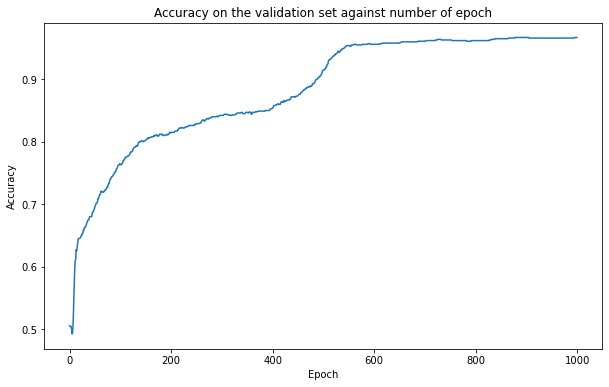

In [28]:
def plot_accuracy_val_set_curve(logs):
    fig = plt.figure(figsize = (10, 6))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Accuracy on the validation set against number of epoch')
    plt.plot(logs)
    plt.show()
plot_accuracy_val_set_curve(accuracy_val_set)

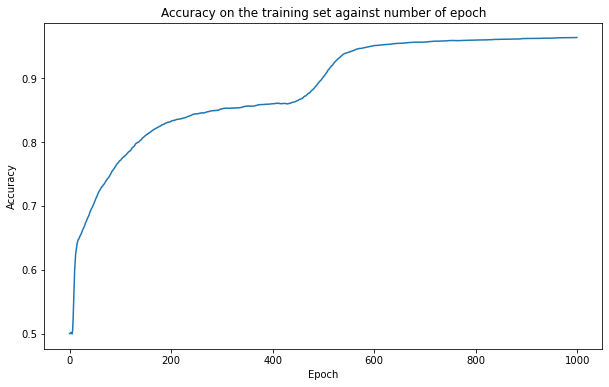

In [29]:
def plot_accuracy_train_set_curve(logs):
    fig = plt.figure(figsize = (10, 6))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Accuracy on the training set against number of epoch')
    plt.plot(logs)
    plt.show()
plot_accuracy_train_set_curve(accuracy_train_set)

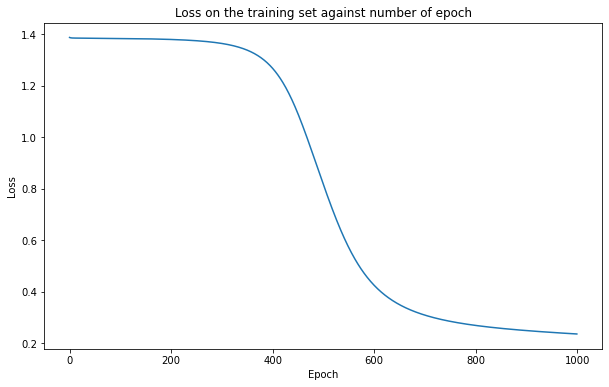

In [30]:
def plot_loss_curve(logs):
    fig = plt.figure(figsize = (10, 6))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Loss on the training set against number of epoch')
    plt.plot(logs)
    plt.show()
plot_loss_curve(history)

In [31]:
h = forward_propagate(val_input,best_theta1,best_theta2,best_theta3,best_b1,best_b2,best_b3)[6]
prediction = np.argmax(h, axis=1)

def Show_Performance(testLabel,test_result):
  print("The accuracy is measured as {}".format(accuracy_score(testLabel, test_result)))  
  print("The precision is measured as {}".format(precision_score(testLabel, test_result, average = 'weighted')))
  print("The recall is measured as {}".format(recall_score(testLabel, test_result, average = 'weighted')))

In [32]:
h_train = forward_propagate(train_input,best_theta1,best_theta2,best_theta3,best_b1,best_b2,best_b3)[6]
prediction_train = np.argmax(h_train,axis=1)
prediction_train = change_to_onehot(prediction_train,2) #change the prediction result to one hot label
print("The accuracy in the train set is measured as {}".format(accuracy_score(train_output, prediction_train)))  

The accuracy in the train set is measured as 0.9636666666666667


In [33]:
h_val = forward_propagate(val_input,best_theta1,best_theta2,best_theta3,best_b1,best_b2,best_b3)[6]
prediction_val = np.argmax(h_val,axis=1)
prediction_val = change_to_onehot(prediction_val,2) #change the prediction result to one hot label
print("The accuracy in the validation set is measured as {}".format(accuracy_score(val_output, prediction_val)))  

The accuracy in the validation set is measured as 0.967


**Answer:** And the output is shown as The accuracy in the validation set is measured as 0.982. In conclusion, from the measurement of accuracy on both training set and validation set, it can be found that the training of MLP, in this case, is successful and the algorithm can predict whether the graph represents a bag or not with relatively high accuracy. However, it is unusual to see that the accuracy on the validation set is finally higher than the accuracy on the train set. This phenomenon
might be owed to that the task is very easy, and prediction has both very high accuracy on validation and train set. An experiment with more data is expected to be done to check whether this phenomenon still exists.